# Maxsoft and heavyside function approximation

Approximating the maxsoft and heavyside function throuch a $C^\infty$ function is important to apply adjoint-algorithmic differentiation. Here we are showing an alternative to common literature based on the hyperbolic function

In [78]:
from quant_analytics_torch.analytics import maxsoft
import torch

The hyperbolic function is defined as $h(x) = x + \sqrt{1+x^2}$

In [79]:
x = torch.linspace(-5,5,101)

In [80]:
y = {}
y['max'] = torch.maximum(x,torch.zeros(101))
y['1'] = maxsoft.soft_max_hyperbolic(x,1.)

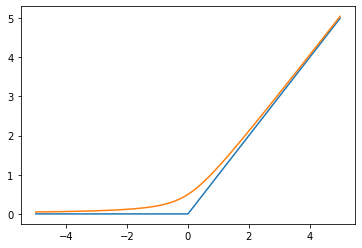

In [81]:
plt.plot(x,y['max'])
plt.plot(x,y['1'])

The function closely mimicks $f(x)=\max\left(x,0\right)$. Adding a scaling parameter $\epsilon$ allows to vary the degree of approximation via $h_\epsilon(x) = h(x / \epsilon) \cdot \epsilon$. Below illustrates this for a smaller x-interval

In [82]:
x = torch.linspace(-0.005,0.005,101)
y = {}
y['max'] = torch.maximum(x,torch.zeros(101))
y['0.01'] = maxsoft.soft_max_hyperbolic(x,0.01)
y['0.001'] = maxsoft.soft_max_hyperbolic(x,0.001)
y['0.0001'] = maxsoft.soft_max_hyperbolic(x,0.0001)

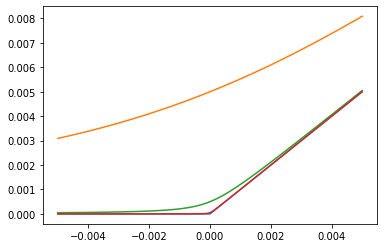

In [83]:
plt.plot(x,y['max'])
plt.plot(x,y['0.01'])
plt.plot(x,y['0.001'])
plt.plot(x,y['0.0001'])

This also allows to approximate the heavisde function $1_{\{x>0\}}=f^\prime(x)$, through $h^\prime(x)=\frac 12 + \frac{x}{2\sqrt{1+x^2}}$

In [84]:
z = {}
z['0.01'] = maxsoft.soft_heavy_side_hyperbolic(x,0.01)
z['0.001'] = maxsoft.soft_heavy_side_hyperbolic(x,0.001)
z['0.0001'] = maxsoft.soft_heavy_side_hyperbolic(x,0.0001)

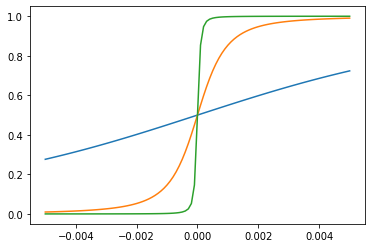

In [85]:
plt.plot(x,z['0.01'])
plt.plot(x,z['0.001'])
plt.plot(x,z['0.0001'])